In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

In [8]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [9]:
data=pd.read_csv("gbm-data.csv")
data.tail()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
3746,1,0.033300,0.506409,0.10,0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0
3750,0,0.133333,0.533952,0.00,0,0.347966,0.757971,0.230667,0.272652,0.854116,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y=data.Activity
del data['Activity']
X=data

In [11]:
y=y.values
X=X.values

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=241)

In [43]:
clf=GradientBoostingClassifier(random_state=241,n_estimators=37,learning_rate=0.2)
clf.fit(X_train,y_train)

GradientBoostingClassifier(init=None, learning_rate=0.2, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=37,
              presort='auto', random_state=241, subsample=1.0, verbose=0,
              warm_start=False)

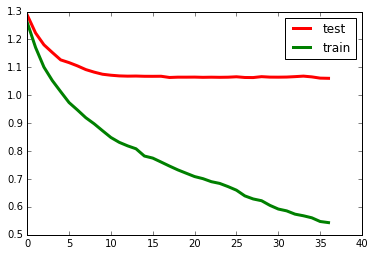

In [44]:
test_score=np.empty(37)
train_score=np.empty(37)
for i, pred in enumerate(clf.staged_decision_function(X_test)):
    test_score[i] = clf.loss_(y_test, pred)

for i, pred in enumerate(clf.staged_decision_function(X_train)):
    train_score[i] = clf.loss_(y_train, pred)

%matplotlib inline
plt.figure()
plt.plot(test_score, 'r', linewidth=3)
plt.plot(train_score, 'g', linewidth=3)
plt.legend(['test', 'train'])

In [45]:
test_score1=[elem for elem in test_score]
test_score1.index(min(test_score))

36

In [46]:
y_pred=clf.predict_proba(X_test)

In [47]:
log_loss(y_test,y_pred)

0.53043981973526533

In [13]:
rf_clf=RandomForestClassifier(random_state=241,n_estimators=250)
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict_proba(X_test)

In [14]:
log_loss(y_test,rf_pred)

0.52445221600093817